In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings 
warnings.filterwarnings("ignore")

In [209]:
np.__version__, pd.__version__

('1.15.4', '0.23.4')

In [210]:
data = pd.read_csv("data/train_traffic_timeseries.csv")

In [211]:
data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


In [213]:
data.shape

(18288, 3)

In [214]:
data['Datetime'] = pd.to_datetime(data.Datetime,format='%d-%m-%Y %H:%M') 

In [215]:
data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [216]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null datetime64[ns]
Count       18288 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 428.7 KB


In [217]:
data['year']=data.Datetime.dt.year
data['month']=data.Datetime.dt.month 
data['day']=data.Datetime.dt.day
data['Hour']=data.Datetime.dt.hour

In [218]:
data.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [219]:
data['day of week']= data['Datetime'].dt.dayofweek

In [220]:
def applyer(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

temp = data['Datetime'].apply(applyer)
data['weekend']=temp


In [221]:
data.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [222]:
data.index = data['Datetime'] 

In [223]:
data = data.drop('ID',1)

In [224]:
data.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [225]:
data = data.drop('Datetime',1)

In [226]:
data.head()

,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,
2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2,2012,8,25,4,5,1


### Exploratory Data Analysis : 

In [227]:
ts = data['Count']

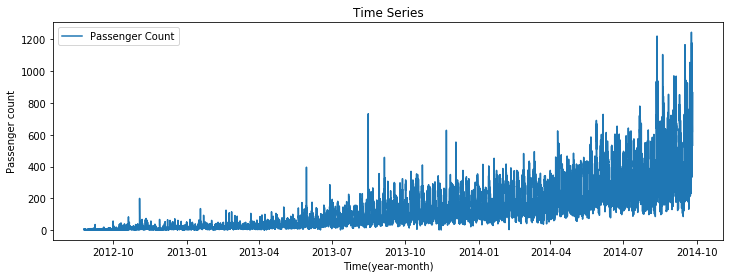

In [228]:
plt.figure(figsize=(12,4))
plt.plot(ts, label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

The above plot shows that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts.

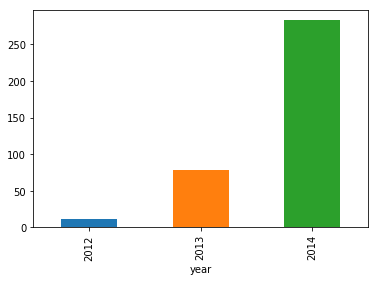

In [229]:
data.groupby('year')['Count'].mean().plot.bar()

The above plot shows that there is an exponential growth in traffic as the year passes.  

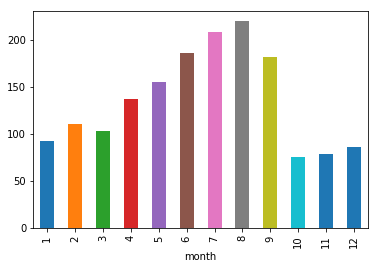

In [230]:
data.groupby('month')['Count'].mean().plot.bar()

Here we see a decrease in the mean of passenger count in last three months. 

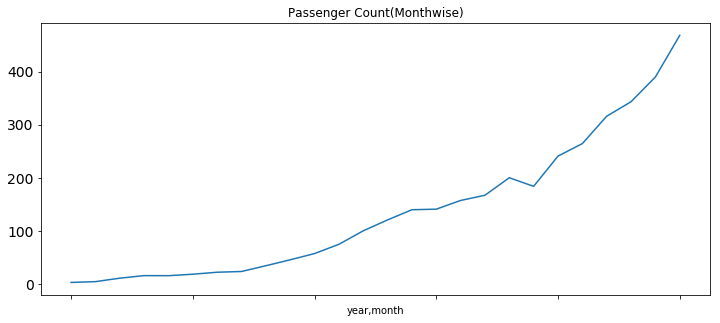

In [231]:
temp1=data.groupby(['year', 'month'])['Count'].mean()
temp1.plot(figsize=(12,5), title= 'Passenger Count(Monthwise)',  fontsize=14)

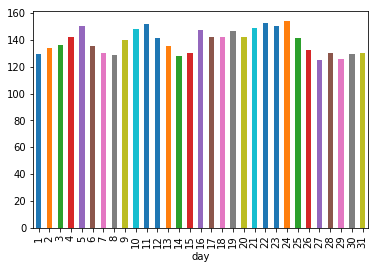

In [232]:
data.groupby('day')['Count'].mean().plot.bar()

Here is not much insights from day wise count of the passengers.

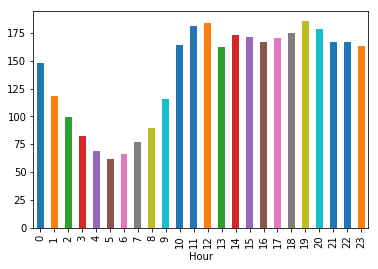

In [233]:
data.groupby('Hour')['Count'].mean().plot.bar()

It can be inferred that the peak traffic is at 7 PM and then there is decreasing trend till 5 AM.
After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

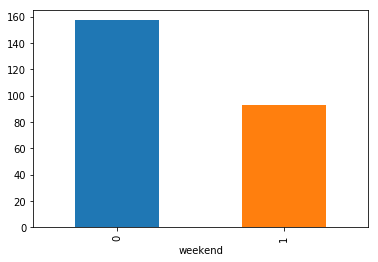

In [234]:
data.groupby('weekend')['Count'].mean().plot.bar()

The above plot shows that there is more traffic on weekends as compared to weekdays.

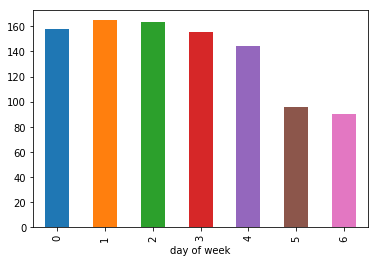

In [235]:
data.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, it can be inferred that the passenger count is less for saturday and sunday as compared to the other days of the week.

In [236]:
# Hourly time series
hourly = data.resample('H').mean()
# Converting to daily mean
daily = data.resample('D').mean()
# Converting to weekly mean
weekly = data.resample('W').mean()
# Converting to monthly mean
monthly = data.resample('M').mean()

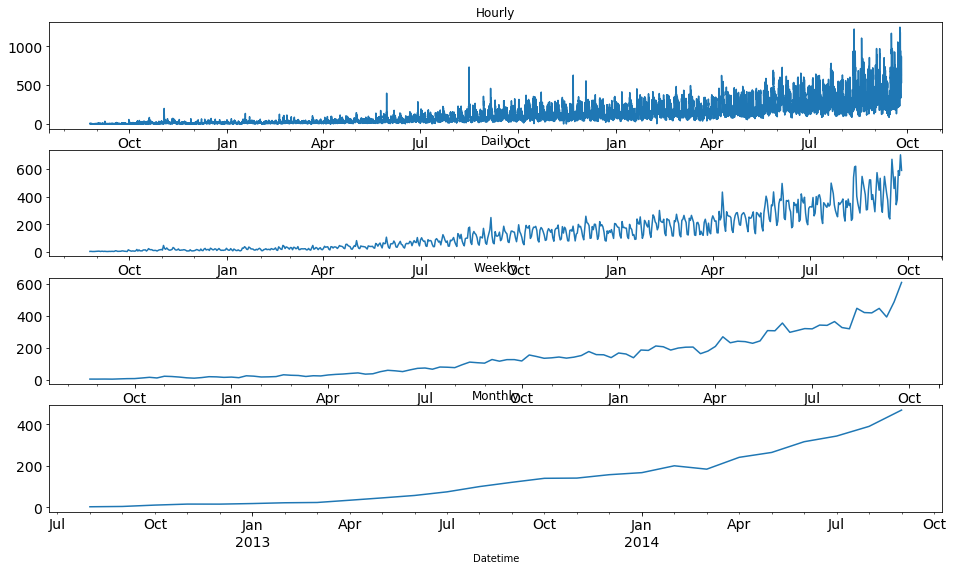

In [237]:
fig, axs = plt.subplots(4,1)
hourly.Count.plot(figsize=(16,9), title= 'Hourly', fontsize=14, ax=axs[0])
daily.Count.plot(figsize=(16,9), title= 'Daily', fontsize=14, ax=axs[1])
weekly.Count.plot(figsize=(16,9), title= 'Weekly', fontsize=14, ax=axs[2])
monthly.Count.plot(figsize=(16,9), title= 'Monthly', fontsize=14, ax=axs[3])
plt.show()

The above plot shows that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

### Splitting the data into training and validation part :

In [238]:
Train=data.ix['2012-08-25':'2014-06-24']
valid=data.ix['2014-06-25':'2014-09-25']

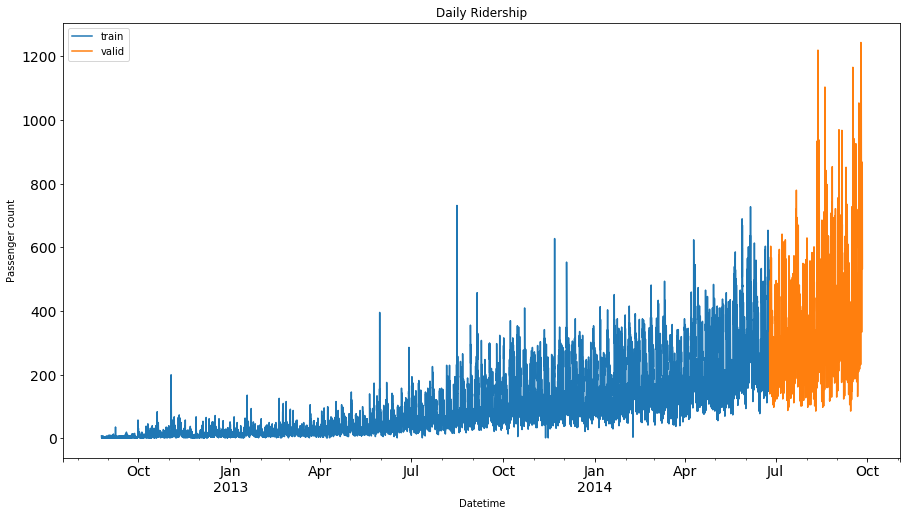

In [239]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid')
plt.xlabel("Datetime")
plt.ylabel("Passenger count")
plt.legend(loc='best')
plt.show()

### Modelling Techniques :

#### 1. Naive Forecast : 

In [240]:
dd = np.asarray(Train.Count)
dd

array([  8,   2,   6, ..., 406, 352, 390], dtype=int64)

In [241]:
y_hat = valid.copy()
y_hat['naive'] = dd[len(dd)-1]

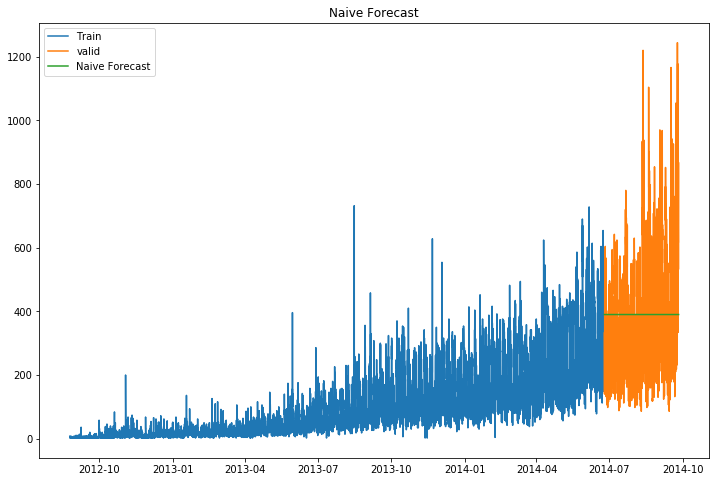

In [242]:
plt.figure(figsize= (12,8))
plt.plot(Train.index,Train['Count'],label ='Train')
plt.plot(valid.index,valid['Count'],label = 'valid')
plt.plot(y_hat.index,y_hat['naive'],label = 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [243]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [244]:
rms = sqrt(mean_squared_error(valid.Count,y_hat.naive))
rms

186.37368520699056

It can be inferred that this method is not suitable for datasets with high variability.

#### 2. Moving Average Method :

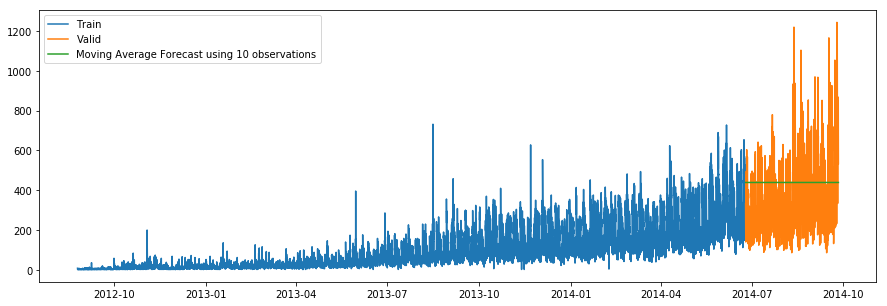

In [245]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()

In [246]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
rms

192.93805680435588

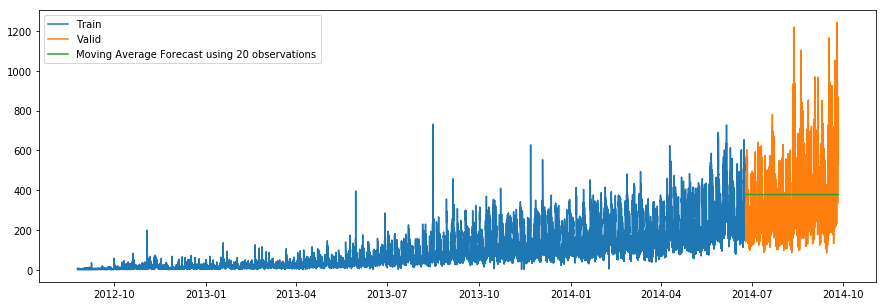

In [247]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()

In [248]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
rms

186.67900919256638

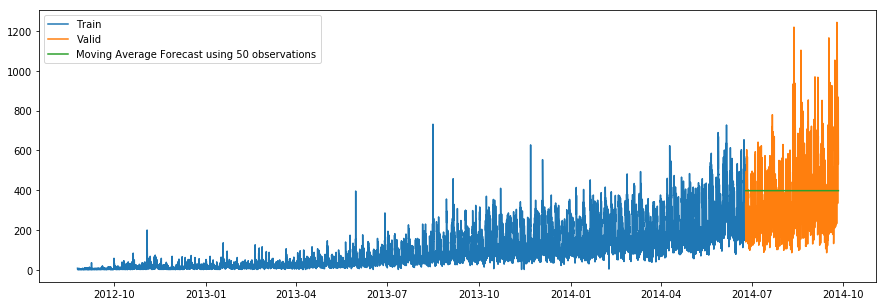

In [249]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1]
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [250]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))
rms

186.5773761711873

It can also be inferred that this method is not suitable for datasets with high variability.

#### 3. Simple Exponential Smoothing :

In [251]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [252]:
y_hat_avg = valid.copy()
fitted = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fitted.forecast(len(valid))

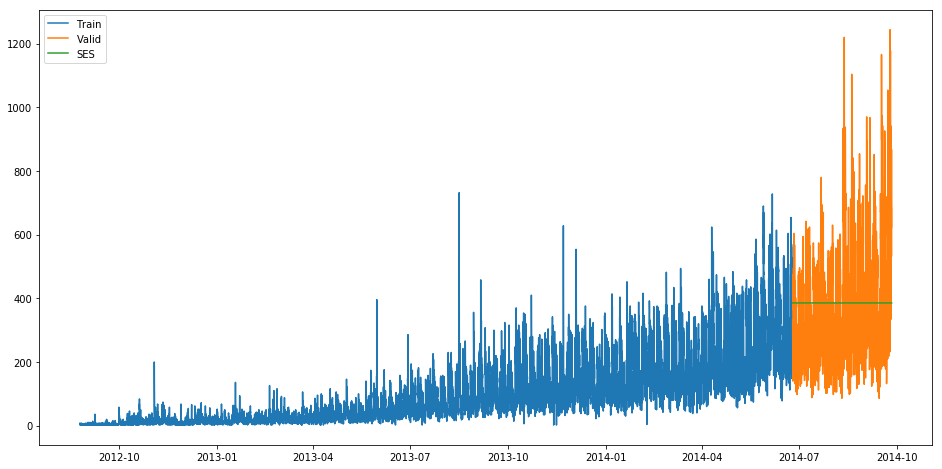

In [253]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


In [254]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SES))
rms

186.40944652452376

#### 4. Holts Linear Trend Model :

In [255]:
import statsmodels.api as sm

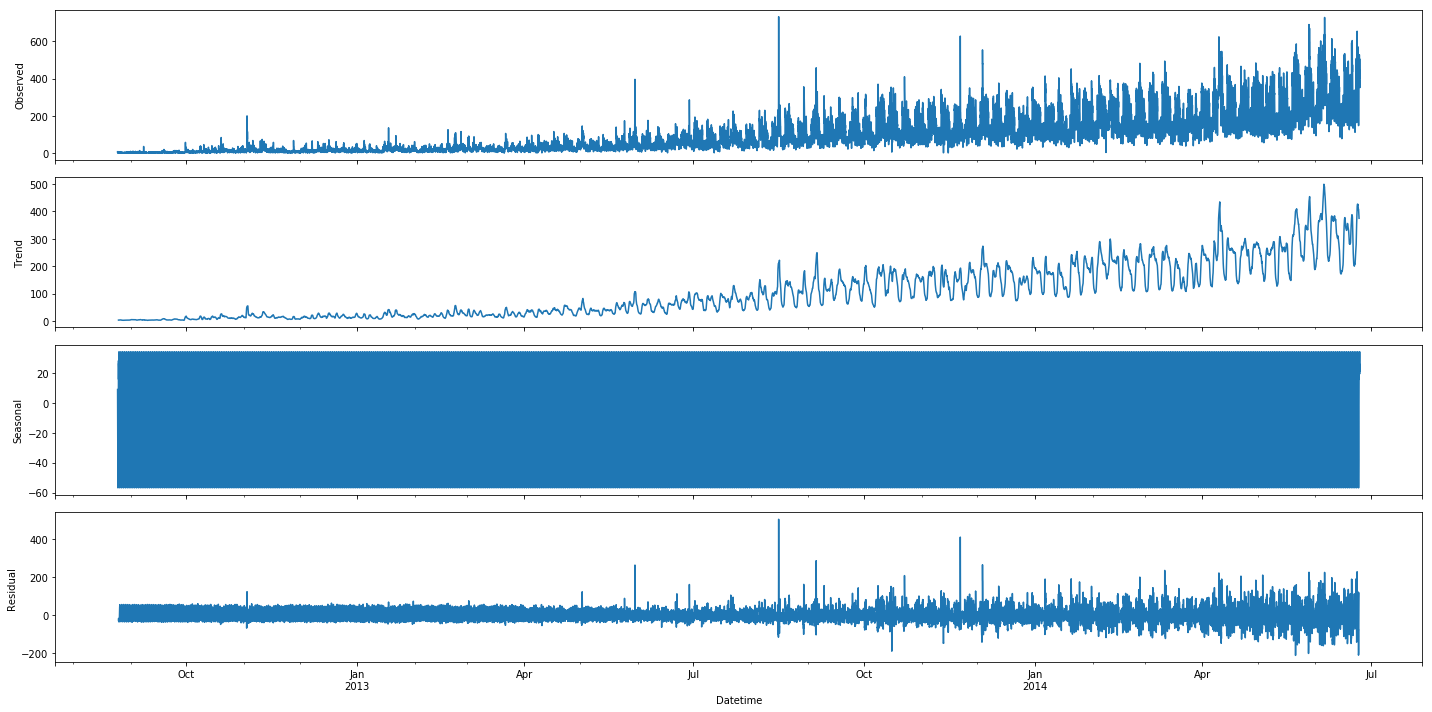

In [256]:
plt.rcParams['figure.figsize'] = 20, 10
sm.tsa.seasonal_decompose(Train.Count).plot()
result = sm.tsa.stattools.adfuller(Train.Count)
plt.show()

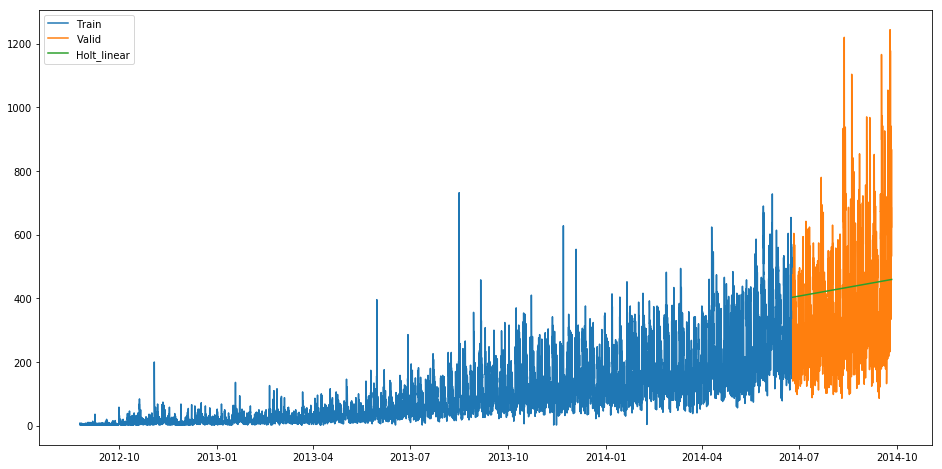

In [257]:
y_hat_avg = valid.copy()

fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3)
y_hat_avg['Holt_linear'] = fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

Here, it is an inclined line as the model has taken into consideration the trend of the time series.

In [258]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_linear))
print(rms)

186.813711409777


In [259]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(24*7).mean()
    rolstd = timeseries.rolling(24*7).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)



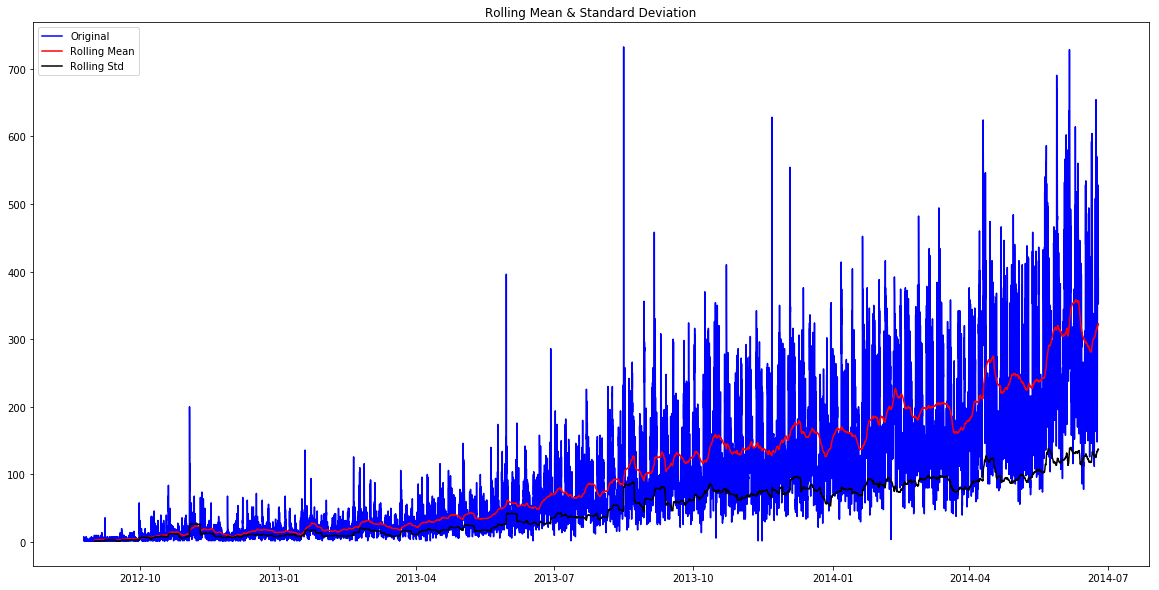

Results of Dickey-Fuller Test:
Test Statistic                    -5.046773
p-value                            0.000018
#Lags Used                        43.000000
Number of Observations Used    16012.000000
Critical Value (1%)               -3.430758
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [260]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(Train['Count'])

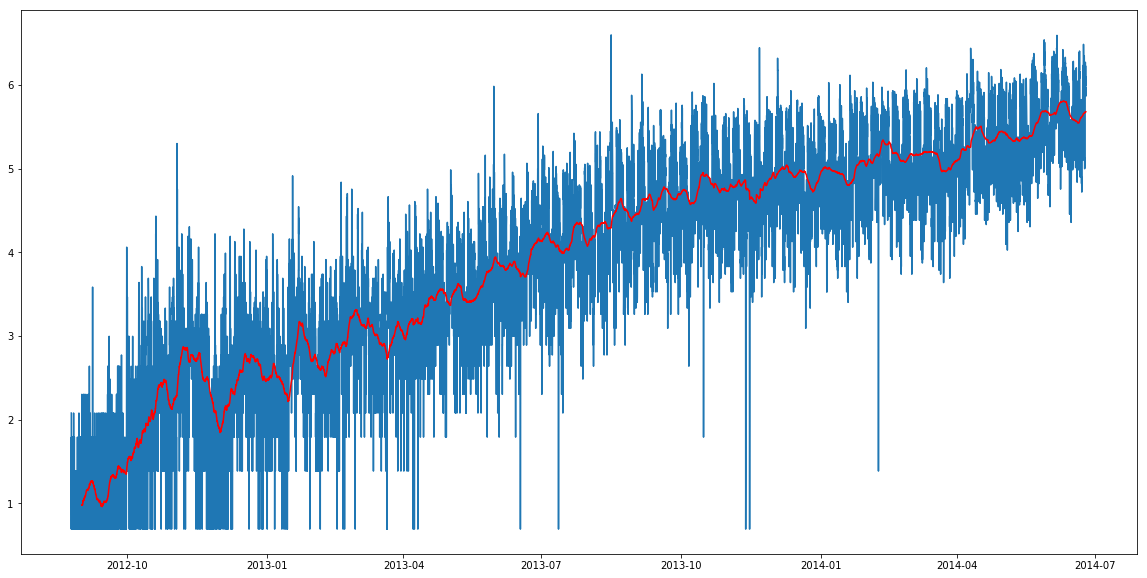

In [261]:
Train_log = np.log(Train['Count']) 
valid_log = np.log(valid['Count'])
moving_avg = Train_log.rolling(24*7).mean() 
plt.plot(Train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [262]:
train_log_moving_avg_diff = Train_log - moving_avg

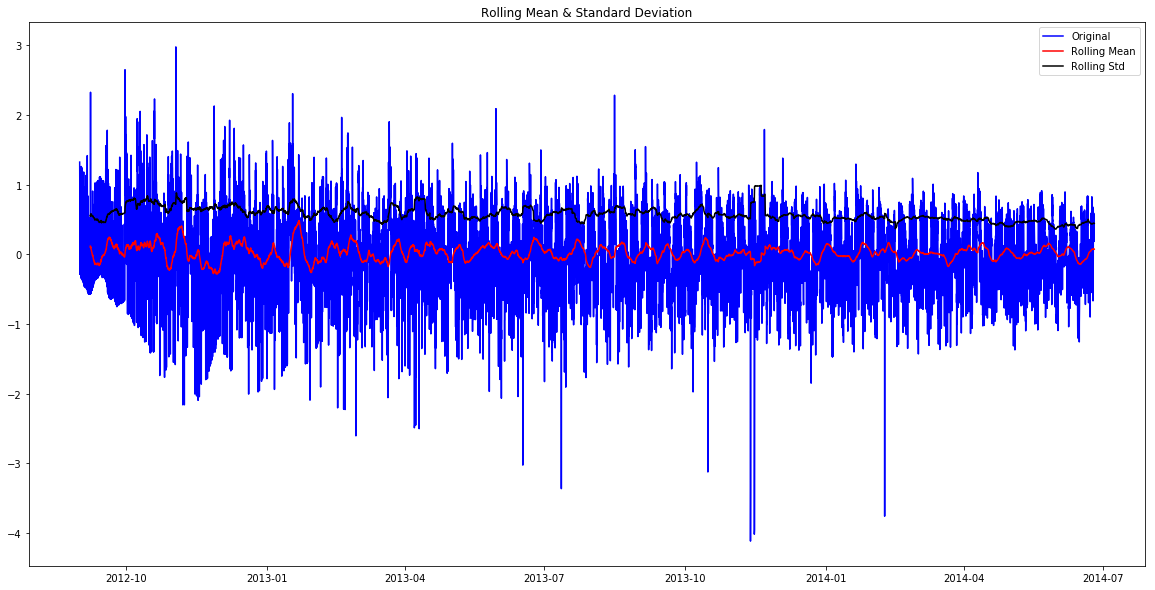

Results of Dickey-Fuller Test:
Test Statistic                -1.770175e+01
p-value                        3.534360e-30
#Lags Used                     4.300000e+01
Number of Observations Used    1.584500e+04
Critical Value (1%)           -3.430763e+00
Critical Value (5%)           -2.861722e+00
Critical Value (10%)          -2.566867e+00
dtype: float64


In [263]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

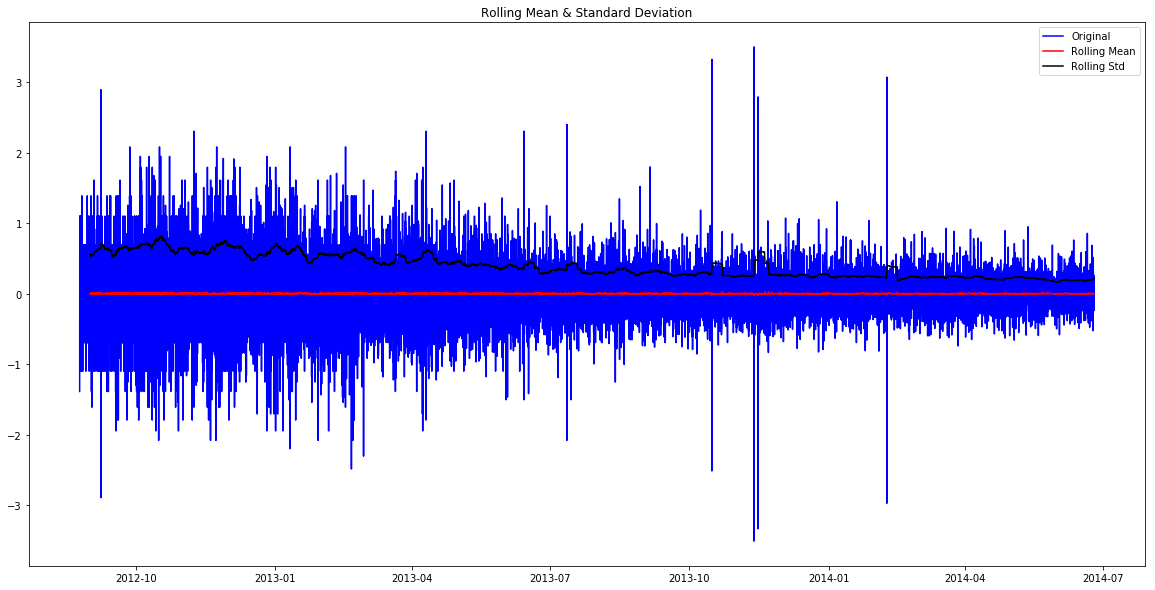

Results of Dickey-Fuller Test:
Test Statistic                   -28.579381
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    16011.000000
Critical Value (1%)               -3.430758
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [264]:
train_log_diff = Train_log - Train_log.shift(1) 
test_stationarity(train_log_diff.dropna())


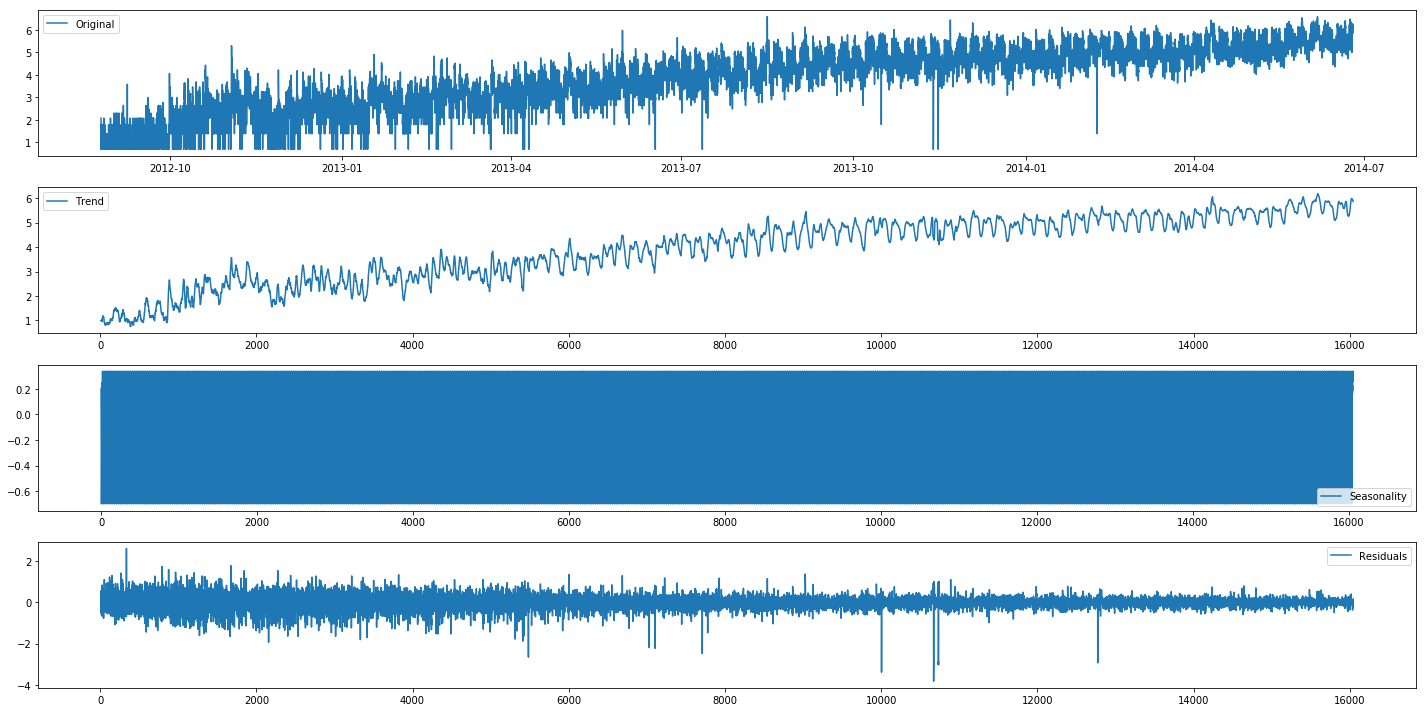

In [265]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()


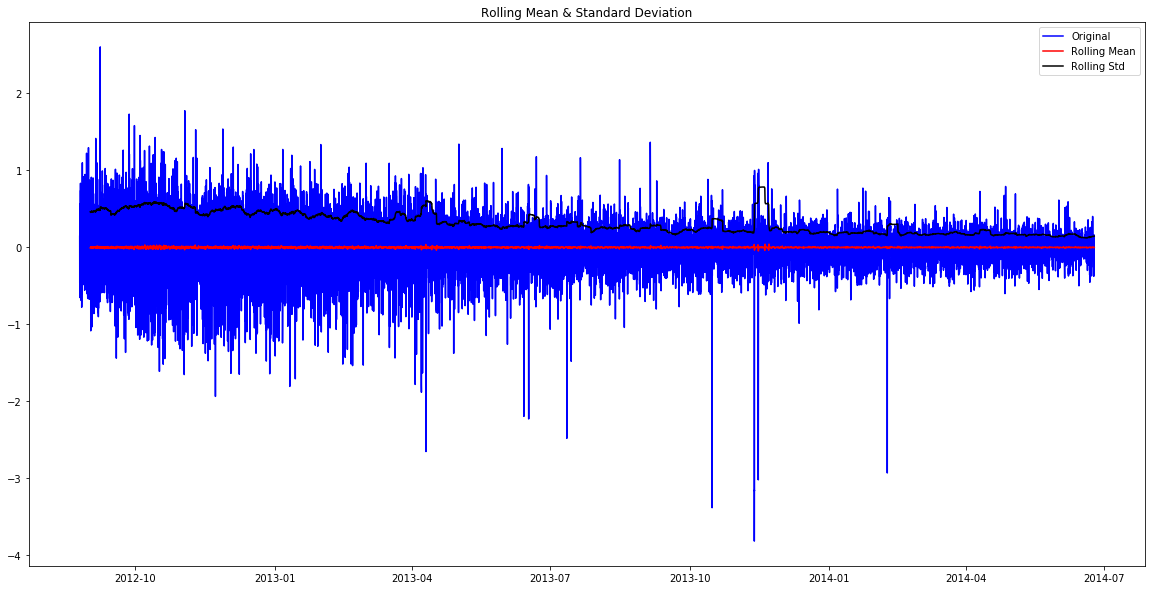

Results of Dickey-Fuller Test:
Test Statistic                   -31.326116
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15988.000000
Critical Value (1%)               -3.430759
Critical Value (5%)               -2.861721
Critical Value (10%)              -2.566866
dtype: float64


In [266]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])


In [267]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=24*7+1) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=24*7+1, method='ols')

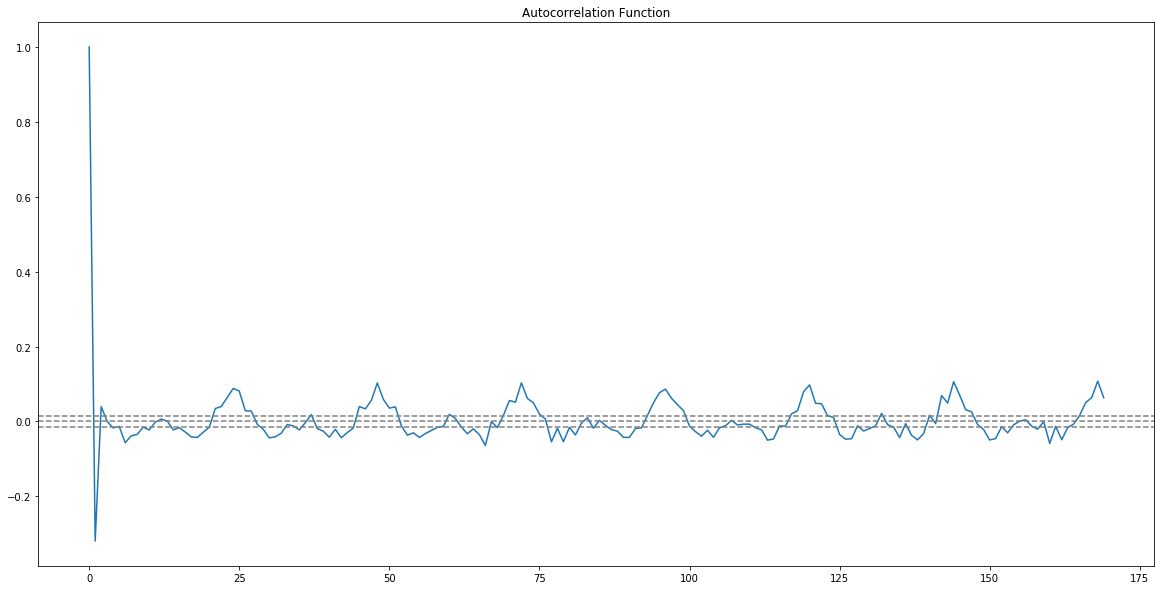

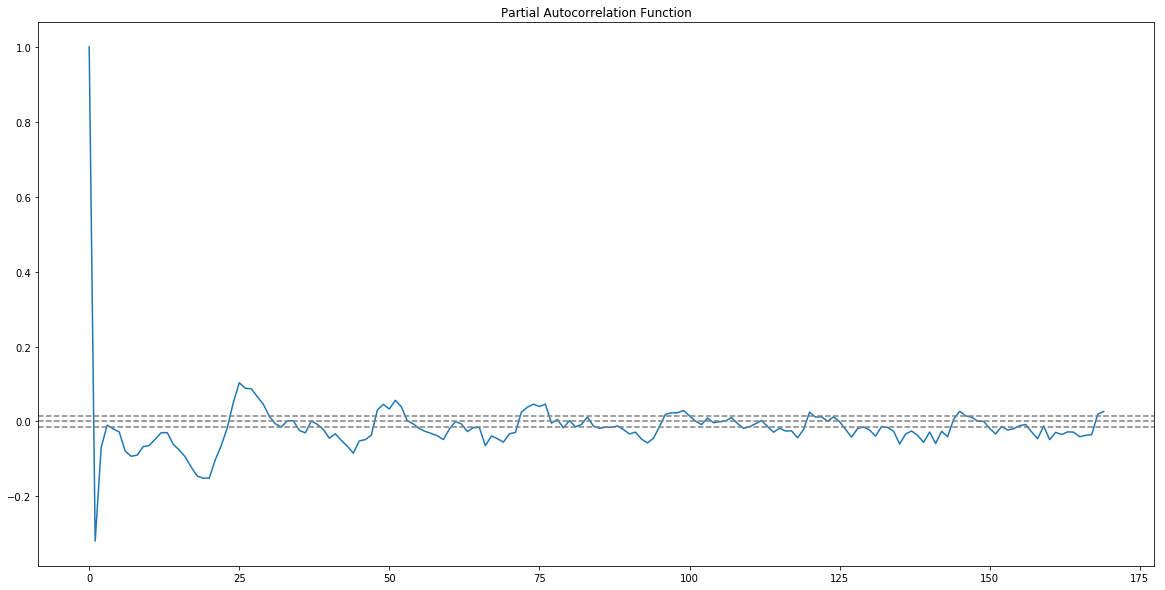

In [268]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

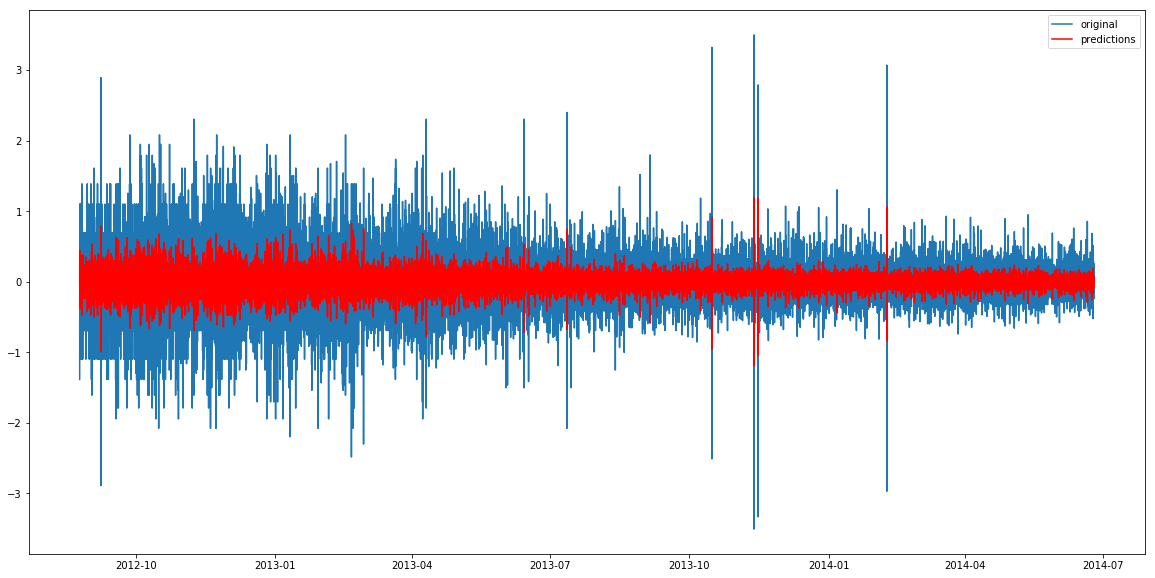

In [269]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()


In [270]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) plt.show()


SyntaxError: invalid syntax (<ipython-input-270-e0d7e28d5095>, line 9)